In [1]:
# 유방암 데이터셋에 선형회귀 적용

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) #random_state=0 은 시드값 설정이다



In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7824123695930645

In [5]:
model.score(X_test, y_test)

0.7291758706114044

In [7]:
#!pip install mglearn
import mglearn

C:\Users\injoo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\injoo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\injoo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 지도학습 - 규제선형모델
(Ridge_Lasso_Regression)

In [9]:
#확장 보스턴 집값
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model_lr =  LinearRegression().fit(X_train, y_train)

In [10]:
#훈련 세트 점수
model_lr.score(X_train, y_train)

0.9520519609032729

In [11]:
#테스트 세트 점수
model_lr.score(X_test, y_test)

0.607472195966585

테스트 셋과 훈련 셋 차이가 크다. 과적합 문제

확장 보스턴 집값 셋에 릿지회귀 적용

In [27]:
#model_ridge
from sklearn.linear_model import Ridge

model_ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(model_ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_ridge.score(X_test, y_test)))


훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [28]:
# model_ridge_alpha_10
model_ridge_alpha_10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(model_ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_ridge.score(X_test, y_test)))


훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [29]:
# model_ridge_alpha_01
model_ridge_alpha_01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(model_ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_ridge.score(X_test, y_test)))


훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


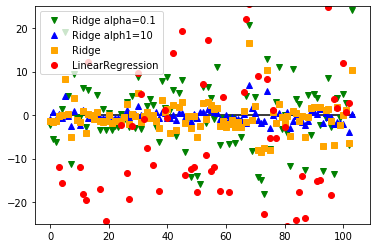

In [38]:
import matplotlib.pyplot as plt

# a 값의 변화에 따른 가중치 (coef_)의 변화
plt.plot(model_ridge_alpha_01.coef_, 'v', label="Ridge alpha=0.1", color="green")
plt.plot(model_ridge_alpha_10.coef_, '^', label="Ridge alph1=10", color="blue")
plt.plot(model_ridge.coef_, 's', label="Ridge", color="orange")
plt.plot(model_lr.coef_, 'o', label="LinearRegression", color="red")
plt.hlines(0,0, len(model_lr.coef_))
plt.ylim(-25, 25)
plt.legend()

### Lasso

In [41]:
#model_lasso
from sklearn.linear_model import Lasso
import numpy as np

model_lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(model_lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(model_lasso.coef_ !=0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [43]:
# lasso 001
model_lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(model_lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(model_lasso001.coef_ !=0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [44]:
# lasso00001
model_lasso00001 = Lasso(alpha=0.0001, max_iter=10000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(model_lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(model_lasso00001.coef_ !=0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.65
사용한 특성의 수: 97


C:\Users\injoo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.1817974201622, tolerance: 3.233182126649077
  positive)


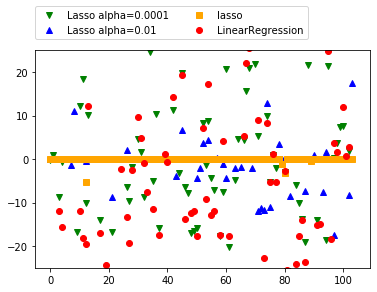

In [46]:
import matplotlib.pyplot as plt

# a 값의 변화에 따른 가중치 (coef_)의 변화
plt.plot(model_lasso00001.coef_, 'v', label="Lasso alpha=0.0001", color="green")
plt.plot(model_lasso001.coef_, '^', label="Lasso alpha=0.01", color="blue")
plt.plot(model_lasso.coef_, 's', label="lasso", color="orange")
plt.plot(model_lr.coef_, 'o', label="LinearRegression", color="red")
plt.hlines(0,0, len(model_lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))